In [1]:
import mytry
import matplotlib.pyplot as plt
import os
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
EPOCH = 1000
TARGET_CATEGORY = '일반교습학원'

filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"
savepath = os.path.join('./log', TARGET_CATEGORY)

In [28]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category=TARGET_CATEGORY, 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (585, 30), accumulate : (585, 30)
[train] 2017_2 : (585, 30), accumulate : (1170, 30)
[train] 2017_3 : (585, 30), accumulate : (1755, 30)
[train] 2017_4 : (585, 30), accumulate : (2340, 30)
[train] 2018_1 : (585, 30), accumulate : (2925, 30)
[train] 2018_2 : (585, 30), accumulate : (3510, 30)
[train] 2018_3 : (585, 30), accumulate : (4095, 30)
[test] 2019_1 : (585, 30), accumulate : (585, 30)
[test] 2019_2 : (585, 30), accumulate : (1170, 30)
[test] 2019_3 : (585, 30), accumulate : (1755, 30)
[test] 2018_4 : (585, 30), accumulate : (2340, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.79 0.13 0.05 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
pca ratios [0.79 0.13 0.05 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
pca top-2


In [29]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [30]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 647683949.026937
R2 : 0.595982
----------------------------
[790510.18000329] 1931
평균 오차 409%
최대 오차 15280%
최소 오차 0%


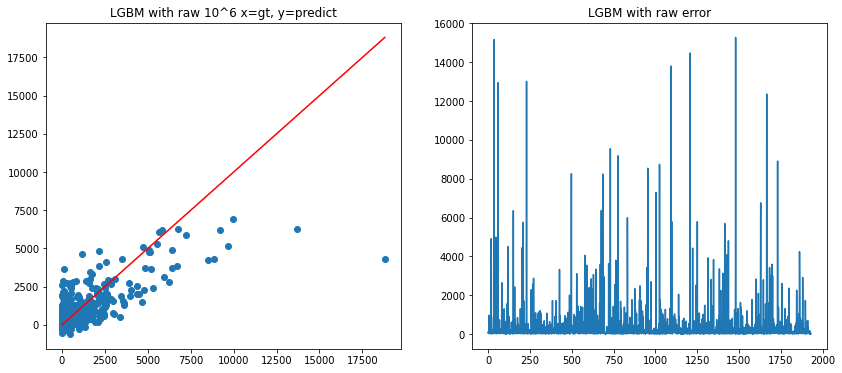

In [31]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw', savepath=savepath)

In [32]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [33]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std
)

In [34]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [35]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

....
Epoch 00194: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00204: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00214: ReduceLROnPlateau reducing learning rate to 1e-06.
./log/일반교습학원/4-MLP_raw-epoch:0233-val_mse:1127531925695627264.0000.hdf5 saved


In [36]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

.
Epoch 00030: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/일반교습학원/4-MLP_minmax-epoch:0999-val_mse:0.0017.hdf5 saved


In [37]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

....................
Epoch 00999: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
./log/일반교습학원/4-MLP_std-epoch:0999-val_mse:0.4174.hdf5 saved


In [64]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH,
    lr = 1e-5
)

.......
Epoch 00302: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 00316: ReduceLROnPlateau reducing learning rate to 1e-06.
............../log/일반교습학원/4-MLP_pca-epoch:0999-val_mse:0.9274.hdf5 saved


## 5-MLP [24, 12, 6, 1]

In [65]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

..
Epoch 00077: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/일반교습학원/5-MLP_raw-epoch:0116-val_mse:1128804885282684928.0000.hdf5 saved


In [66]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

.
Epoch 00039: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00056: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00066: ReduceLROnPlateau reducing learning rate to 1e-06.
.................../log/일반교습학원/5-MLP_minmax-epoch:0999-val_mse:0.0012.hdf5 saved


In [67]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

..........
Epoch 00475: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00486: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00496: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/일반교습학원/5-MLP_std-epoch:0525-val_mse:0.3964.hdf5 saved


In [68]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH,
    lr = 1e-5
)

..
Epoch 00068: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 00078: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/일반교습학원/5-MLP_pca-epoch:0122-val_mse:0.9271.hdf5 saved


# Evaluate

## LGBM

------- evaluate LGBM with raw -------
RMSE : 647683949.026937
R2 : 0.595982
----------------------------
[790510.18000329] 1931
평균 오차 409%
최대 오차 15280%
최소 오차 0%


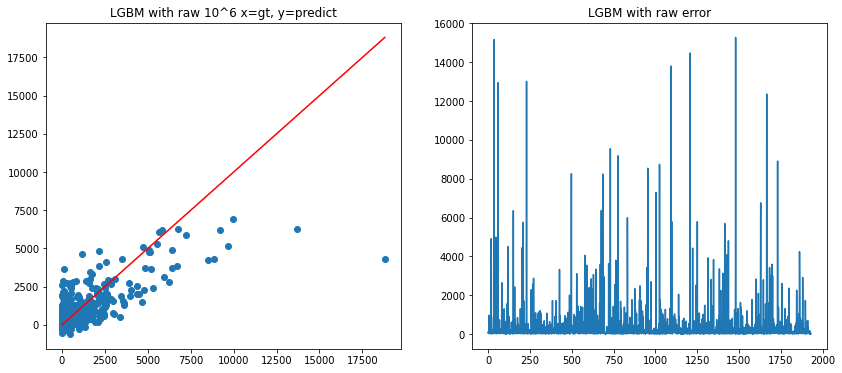

In [69]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='LGBM with raw', savepath=savepath)

------- evaluate LGBM with minmax norm -------
RMSE : 656973074.929414
R2 : 0.584309
----------------------------
[799592.42689522] 1931
평균 오차 414%
최대 오차 15999%
최소 오차 0%


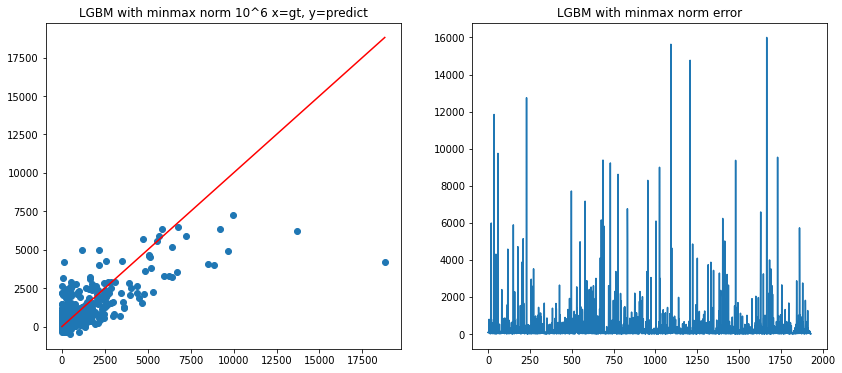

In [70]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='LGBM with minmax norm', savepath=savepath)

------- evaluate LGBM with std norm -------
RMSE : 664374882.731512
R2 : 0.574890
----------------------------
[793654.26923162] 1931
평균 오차 411%
최대 오차 20800%
최소 오차 0%


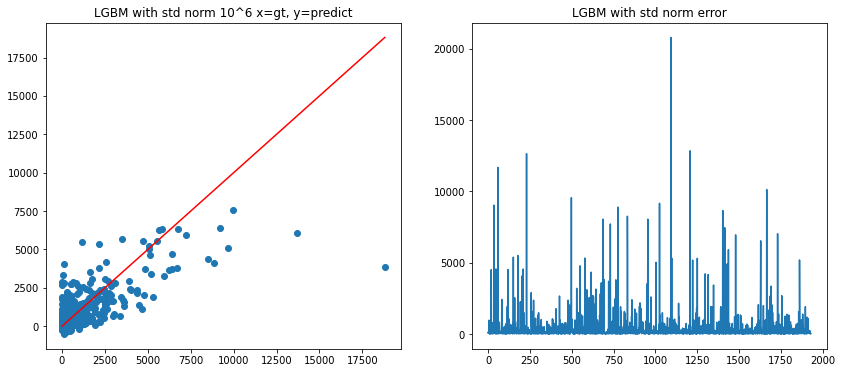

In [71]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='LGBM with std norm', savepath=savepath)

------- evaluate LGBM with PCA -------
RMSE : 1012711858.123626
R2 : 0.012251
----------------------------
[1326857.98343877] 1931
평균 오차 687%
최대 오차 90096%
최소 오차 0%


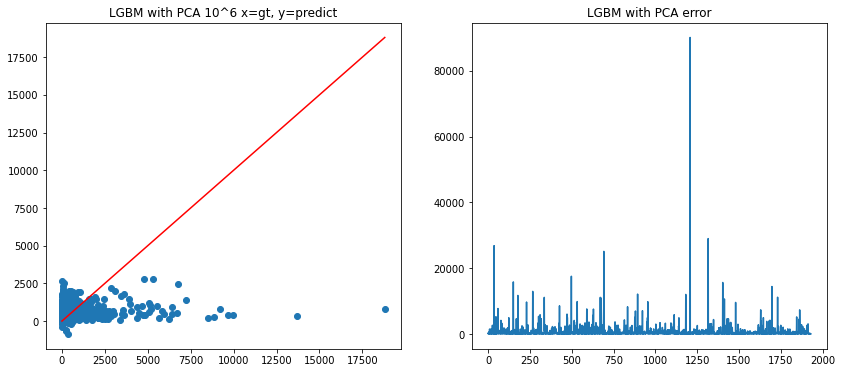

In [72]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='LGBM with PCA', savepath=savepath)

## 4-MLP

------- evaluate 4-MLP with raw -------
RMSE : 1061800864.977288
R2 : -0.085828
----------------------------
[576162.83073149] 1931
평균 오차 298%
최대 오차 16605%
최소 오차 0%


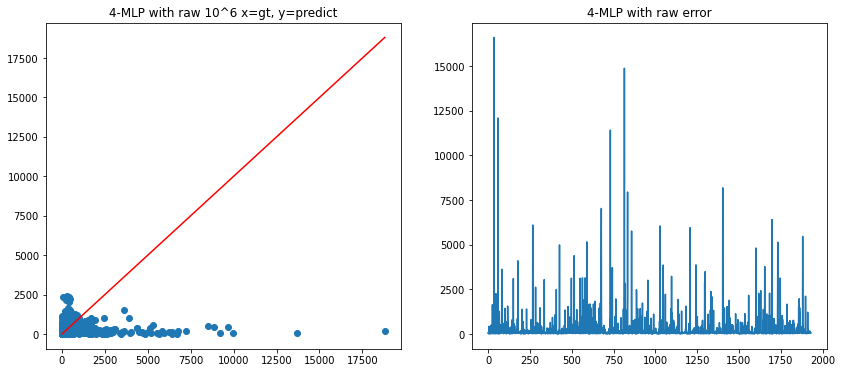

In [73]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='4-MLP with raw', savepath=savepath)

------- evaluate 4-MLP with minmax norm -------
RMSE : 901132379.539406
R2 : 0.217918
----------------------------
[1290682.18103748] 1931
평균 오차 668%
최대 오차 26749%
최소 오차 0%


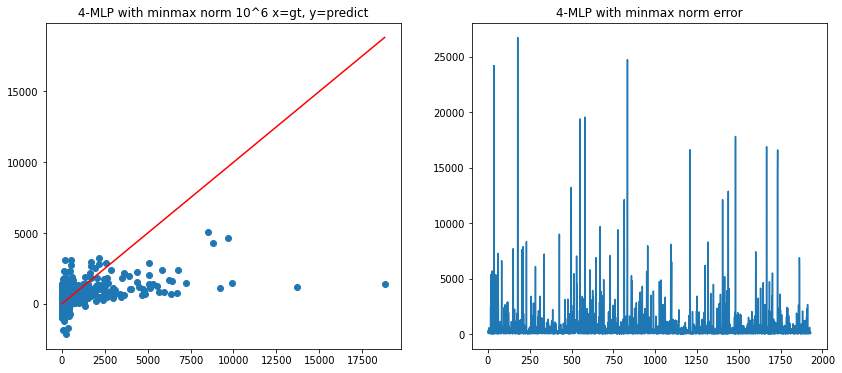

In [74]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='4-MLP with minmax norm', savepath=savepath)

------- evaluate 4-MLP with std -------
RMSE : 682352746.317496
R2 : 0.551572
----------------------------
[822787.86759063] 1931
평균 오차 426%
최대 오차 22062%
최소 오차 0%


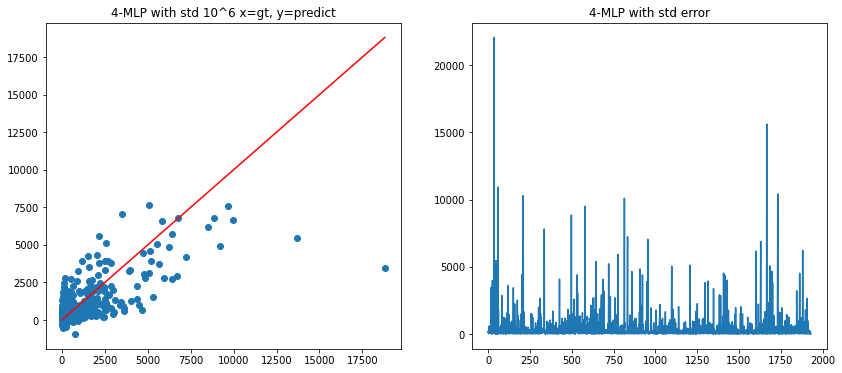

In [75]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='4-MLP with std', savepath=savepath)

------- evaluate 4-MLP with PCA -------
RMSE : 1017057637.969678
R2 : 0.003755
----------------------------
[1374097.63138598] 1931
평균 오차 712%
최대 오차 25867%
최소 오차 0%


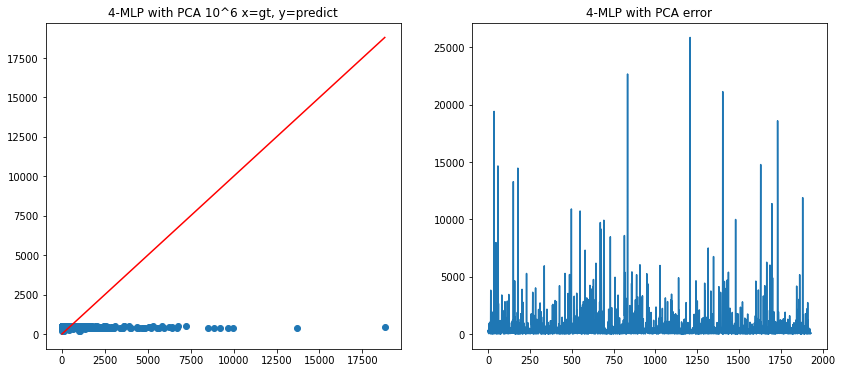

In [76]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='4-MLP with PCA', savepath=savepath)

# 5-MLP

------- evaluate 5-MLP with raw -------
RMSE : 1062215138.836095
R2 : -0.086676
----------------------------
[563000.66202458] 1931
평균 오차 292%
최대 오차 16199%
최소 오차 0%


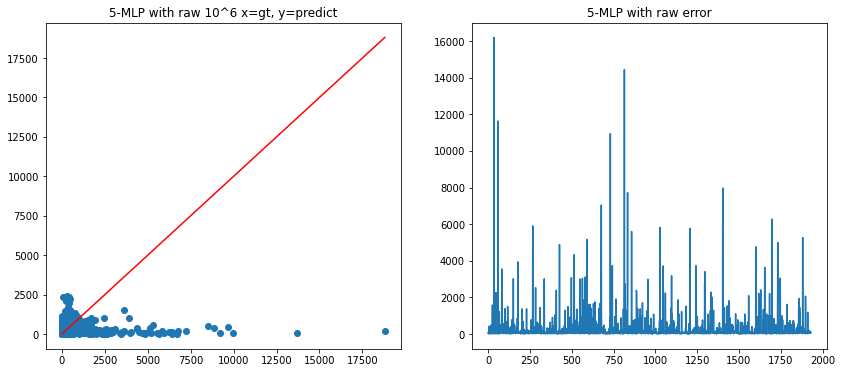

In [77]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='5-MLP with raw', savepath=savepath)

------- evaluate 5-MLP with minmax norm -------
RMSE : 762229294.181576
R2 : 0.440441
----------------------------
[947168.03846139] 1931
평균 오차 491%
최대 오차 26042%
최소 오차 0%


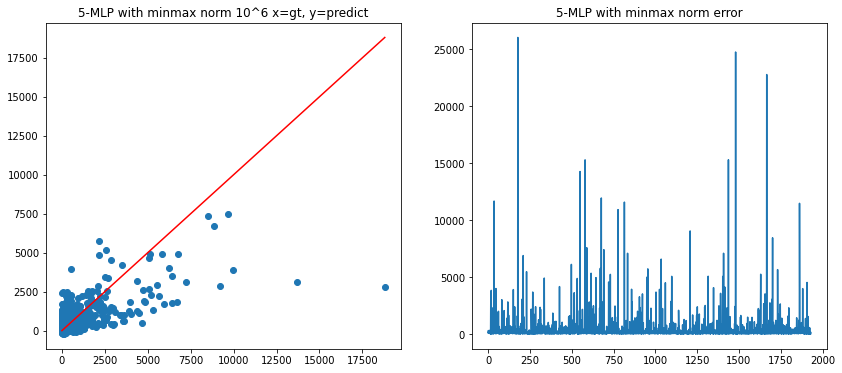

In [78]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='5-MLP with minmax norm', savepath=savepath)

------- evaluate 5-MLP with std norm -------
RMSE : 664219907.771663
R2 : 0.575088
----------------------------
[759374.876074] 1931
평균 오차 393%
최대 오차 14846%
최소 오차 0%


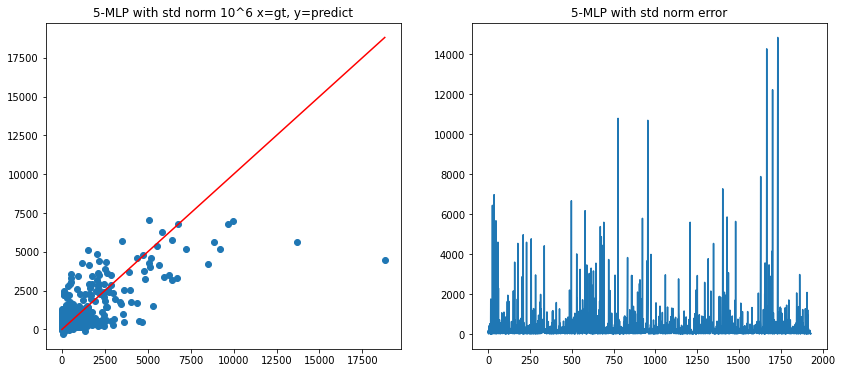

In [79]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='5-MLP with std norm', savepath=savepath)

------- evaluate 5-MLP with PCA -------
RMSE : 1016913273.043535
R2 : 0.004038
----------------------------
[1459142.16386698] 1931
평균 오차 756%
최대 오차 31465%
최소 오차 0%


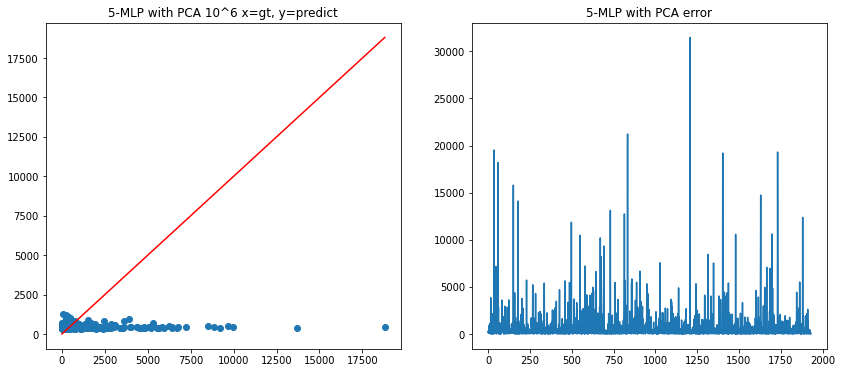

In [80]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='5-MLP with PCA', savepath=savepath)

# Appendix - MLP training history

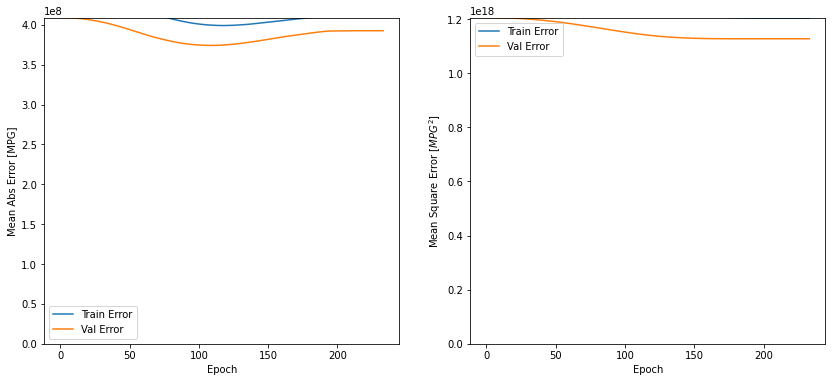

In [81]:
my_MLP.plot_history(hist_4MLP_raw)

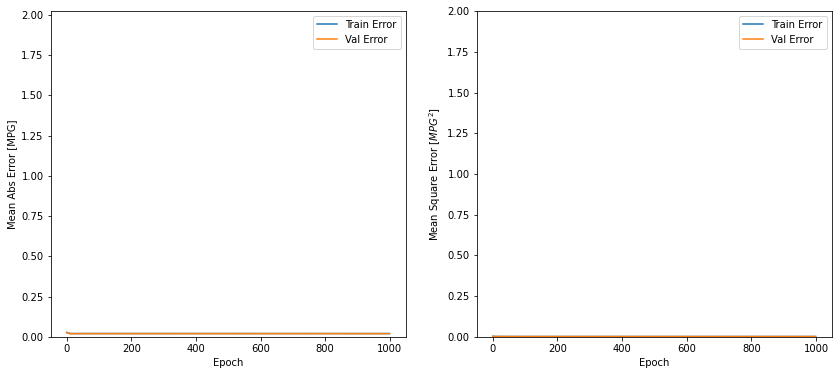

In [82]:
my_MLP.plot_history(hist_4MLP_minmax)

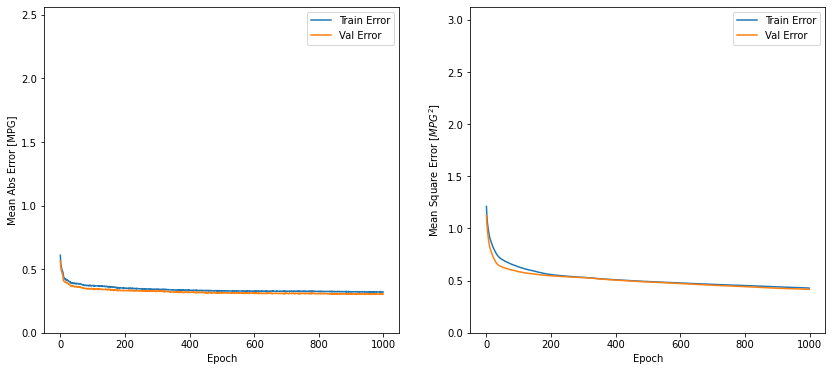

In [83]:
my_MLP.plot_history(hist_4MLP_std)

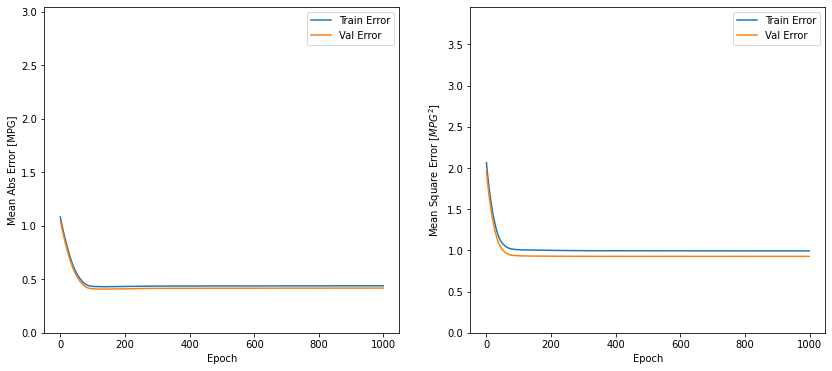

In [84]:
my_MLP.plot_history(hist_4MLP_pca)

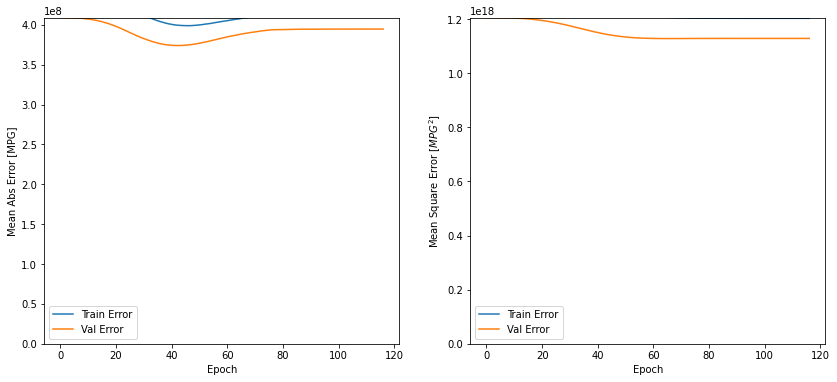

In [85]:
my_MLP.plot_history(hist_5MLP_raw)

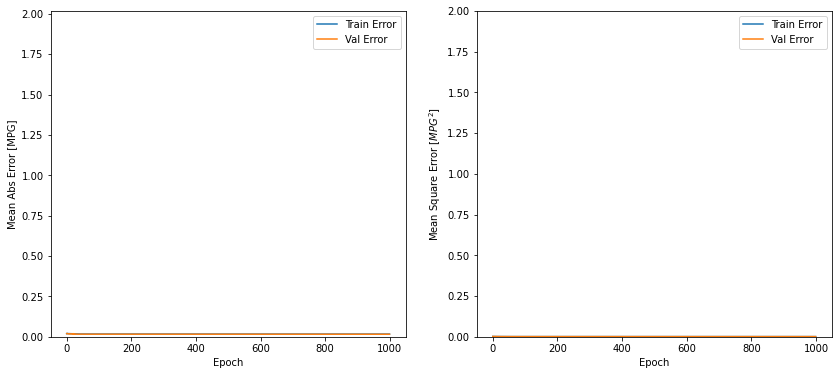

In [86]:
my_MLP.plot_history(hist_5MLP_minmax)

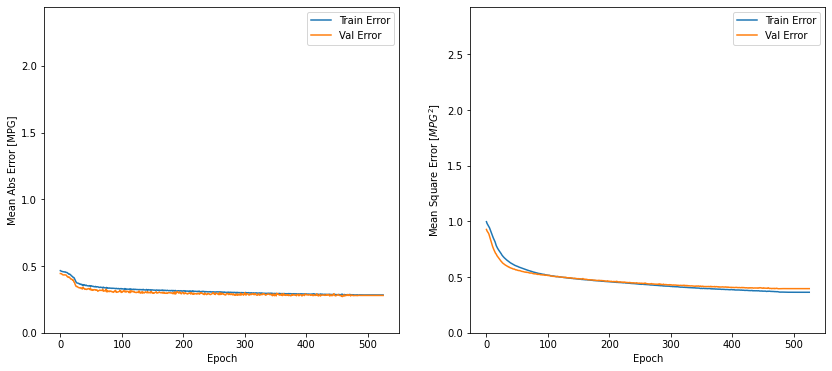

In [87]:
my_MLP.plot_history(hist_5MLP_std)

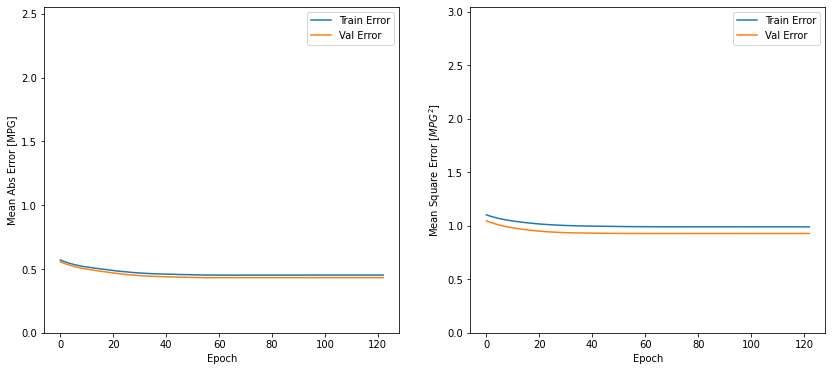

In [88]:
my_MLP.plot_history(hist_5MLP_pca)